In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [5]:
#Calculamos el numero total de la población "n"

Amsterdam['host_total_listings_count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [6]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['host_total_listings_count'].max()
Min = Amsterdam['host_total_listings_count'].min()
Limites = [Min, Max]
Limites

[1.0, 3.0]

In [7]:
# Calculamos el rango R
R = Max - Min
R

2.0

In [8]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [9]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.140548386720728

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [10]:
# Categorización de variables
intervalos = np.linspace (1, 3, 15)
intervalos

array([1.        , 1.14285714, 1.28571429, 1.42857143, 1.57142857,
       1.71428571, 1.85714286, 2.        , 2.14285714, 2.28571429,
       2.42857143, 2.57142857, 2.71428571, 2.85714286, 3.        ])

In [11]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [12]:
# Creamos las ctegorias en la columna numerica
Amsterdam['host_total_listings_count'] = pd.cut ( x = Amsterdam ['host_total_listings_count'], bins = intervalos, labels = categorias )
Amsterdam['host_total_listings_count']

0        Categoria7
1               NaN
2               NaN
3        Categoria3
4               NaN
           ...     
9654     Categoria7
9655    Categoria14
9656            NaN
9657            NaN
9658     Categoria3
Name: host_total_listings_count, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [13]:
table1 = freq_tbl(Amsterdam['host_total_listings_count'])
table1

,host_total_listings_count,frequency,percentage,cumulative_perc
0,Categoria7,1848,0.191324,0.442529
1,Categoria3,1536,0.159023,0.810345
2,Categoria14,792,0.081996,1.000000
3,Categoria1,0,0.000000,1.000000
4,Categoria2,0,0.000000,1.000000
5,Categoria4,0,0.000000,1.000000
6,Categoria5,0,0.000000,1.000000
7,Categoria6,0,0.000000,1.000000
8,Categoria8,0,0.000000,1.000000
9,Categoria9,0,0.000000,1.000000


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_total_listings_count,frequency
0,Categoria7,1848
1,Categoria3,1536
2,Categoria14,792
3,Categoria1,0
4,Categoria2,0
5,Categoria4,0
6,Categoria5,0
7,Categoria6,0
8,Categoria8,0
9,Categoria9,0


In [15]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] > 0]
Filtro

,host_total_listings_count,frequency
0,Categoria7,1848
1,Categoria3,1536
2,Categoria14,792


In [19]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('host_total_listings_count')
Filtro_index

,frequency
host_total_listings_count,
Categoria7,1848
Categoria3,1536
Categoria14,792


<Axes: ylabel='frequency'>

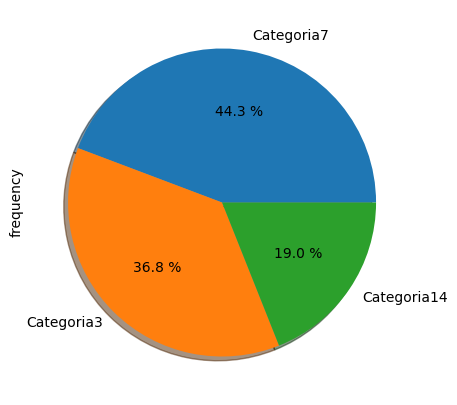

In [20]:
# Realizamos gráfico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind = 'pie', figsize = (10,5), shadow = True, autopct = "%0.1f %%")